<a href="https://colab.research.google.com/github/Siriprapa-tewee/229351/blob/main/229351_LAB08_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 8

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 24 เดือนสุดท้ายและ Training set เป็นข้อมูลก่อนหน้าทั้งหมด
3. ลองสร้างโมเดล Holt-Winters แบบต่างๆ (damped, non-damped, additive, multiplicative etc.) แล้วระบุโมเดลที่ดีที่ให้ค่า RMSE บน test set น้อยที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [ ]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-12 07:57:54--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.01s   

2025-09-12 07:57:55 (10.3 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [ ]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime
from sklearn.metrics import mean_squared_error

In [ ]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],
                                        index_col='Date',
                                        date_parser=parser)

data.tail()

/tmp/ipython-input-2705365328.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],


,MaxTemp
Date,
2019-07-27,26.2
2019-07-28,34.2
2019-07-29,34.4
2019-07-30,33.5
2019-07-31,30.7


In [ ]:
print(data.index.inferred_freq)

D


In [ ]:
y = data['MaxTemp'].astype('float32')

print(y)

Date
1998-01-01    30.600000
1998-01-02    32.000000
1998-01-03    31.600000
1998-01-04    32.099998
1998-01-05    31.200001
                ...    
2019-07-27    26.200001
2019-07-28    34.200001
2019-07-29    34.400002
2019-07-30    33.500000
2019-07-31    30.700001
Name: MaxTemp, Length: 7882, dtype: float32


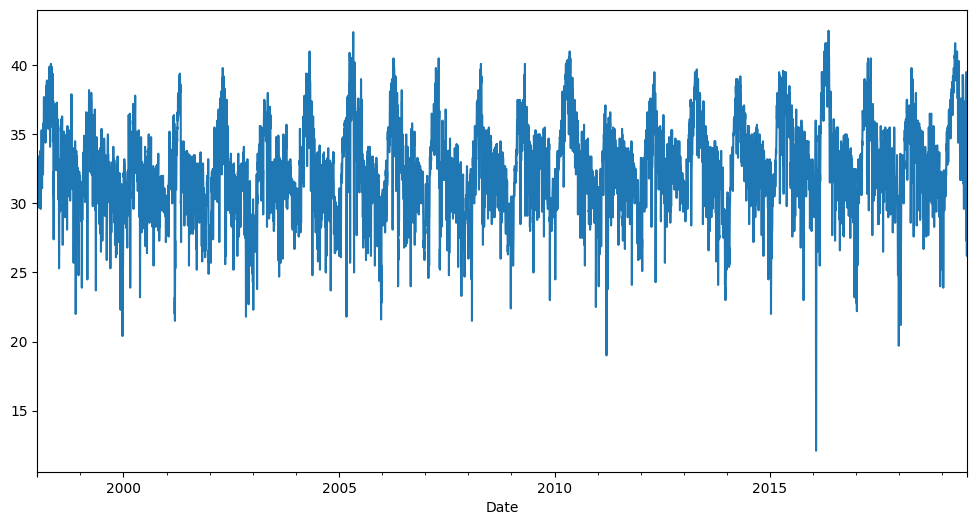

In [ ]:
plt.figure(figsize=(12,6))
y.plot();

ข้อมูลที่ได้เป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วย method `resample`

In [ ]:
data_monthly = data['MaxTemp'].resample("M").mean()

data_monthly.head()

/tmp/ipython-input-3219926365.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data['MaxTemp'].resample("M").mean()


,MaxTemp
Date,
1998-01-31,31.687097
1998-02-28,33.685714
1998-03-31,37.103226
1998-04-30,37.910000
1998-05-31,35.848387


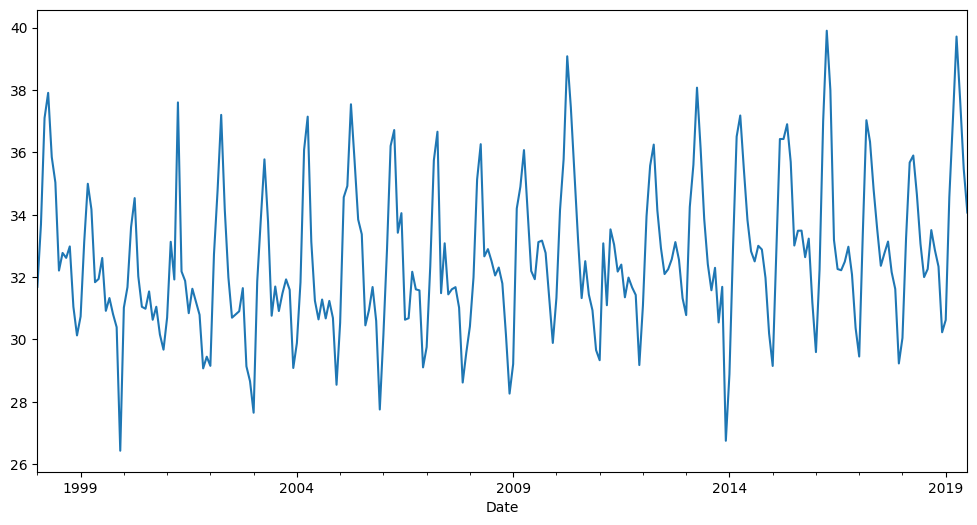

In [ ]:
plt.figure(figsize=(12,6))
data_monthly.plot();

In [ ]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

แบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 24 เดือนสุดท้ายและ Training set เป็นข้อมูลก่อนหน้าทั้งหมด

In [ ]:
train = data_monthly[:-24]
test = data_monthly[-24:]

print(test)

Date
2017-08-31    32.764516
2017-09-30    33.140000
2017-10-31    32.158065
2017-11-30    31.616667
2017-12-31    29.229032
2018-01-31    30.048387
2018-02-28    33.253571
2018-03-31    35.674194
2018-04-30    35.900000
2018-05-31    34.648387
2018-06-30    33.066667
2018-07-31    32.000000
2018-08-31    32.258065
2018-09-30    33.506667
2018-10-31    32.864516
2018-11-30    32.336667
2018-12-31    30.229032
2019-01-31    30.622581
2019-02-28    34.564286
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: ME, Name: MaxTemp, dtype: float64


ลองสร้างโมเดล Holt-Winters แบบต่างๆ (damped, non-damped, additive, multiplicative etc.) แล้วระบุโมเดลที่ดีที่ให้ค่า RMSE บน test set น้อยที่สุด

In [34]:
#Additive trend + Additive seasonal, non-damped
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# สร้างโมเดล
model_aa_nd = ExponentialSmoothing(
    train,
    trend="add",
    damped_trend=False,
    seasonal="add",
    seasonal_periods=12
    ).fit(optimized=True)

# พยากรณ์ค่า
pred_aa_nd = model_aa_nd.forecast(len(test))

# คำนวณ RMSE
rmse_aa_nd = rmse(test, pred_aa_nd)
print("Add-Add Non-damped RMSE:", rmse_aa_nd)

Add-Add Non-damped RMSE: 1.1669523392712184


In [35]:
#Additive trend + Additive seasonal, damped
model_aa_d = ExponentialSmoothing(
      train,
      trend="add",
      damped_trend=True,
      seasonal="add",
      seasonal_periods=12
      ).fit(optimized=True)

pred_aa_d = model_aa_d.forecast(len(test))
rmse_aa_d = rmse(test, pred_aa_d)
print("Add-Add Damped RMSE:", rmse_aa_d)


Add-Add Damped RMSE: 1.1134955121933203


In [37]:
#Additive trend + Multiplicative seasonal, non-damped
model_am_nd = ExponentialSmoothing(
      train,
      trend="add",
      damped_trend=False,
      seasonal="mul",
      seasonal_periods=12
      ).fit(optimized=True)

pred_am_nd = model_am_nd.forecast(len(test))
rmse_am_nd = rmse(test, pred_am_nd)
print("Add-Mul Non-damped RMSE:", rmse_am_nd)

Add-Mul Non-damped RMSE: 1.1639766564724707


In [38]:
#Additive trend + Multiplicative seasonal, damped
model_am_d = ExponentialSmoothing(
      train,
      trend="add",
      damped_trend=True,
      seasonal="mul",
      seasonal_periods=12
      ).fit(optimized=True)

pred_am_d = model_am_d.forecast(len(test))
rmse_am_d = rmse(test, pred_am_d)
print("Add-Mul Damped RMSE:", rmse_am_d)

Add-Mul Damped RMSE: 1.1062443526370112


In [39]:
#Multiplicative trend + Additive seasonal, non-damped
model_ma_nd = ExponentialSmoothing(
      train,
      trend="mul",
      damped_trend=False,
      seasonal="add",
      seasonal_periods=12
      ).fit(optimized=True)

pred_ma_nd = model_ma_nd.forecast(len(test))
rmse_ma_nd = rmse(test, pred_ma_nd)
print("Mul-Add Non-damped RMSE:", rmse_ma_nd)

Mul-Add Non-damped RMSE: 1.1875960299599877


In [40]:
#Multiplicative trend + Additive seasonal, damped
model_ma_d = ExponentialSmoothing(
      train,
      trend="mul",
      damped_trend=True,
      seasonal="add",
      seasonal_periods=12
      ).fit(optimized=True)

pred_ma_d = model_ma_d.forecast(len(test))
rmse_ma_d = rmse(test, pred_ma_d)
print("Mul-Add Damped RMSE:", rmse_ma_d)


Mul-Add Damped RMSE: 0.8958522762071295


In [41]:
#Multiplicative trend + Multiplicative seasonal, non-damped
model_mm_nd = ExponentialSmoothing(
      train,
      trend="mul",
      damped_trend=False,
      seasonal="mul",
      seasonal_periods=12
      ).fit(optimized=True)

pred_mm_nd = model_mm_nd.forecast(len(test))
rmse_mm_nd = rmse(test, pred_mm_nd)
print("Mul-Mul Non-damped RMSE:", rmse_mm_nd)

Mul-Mul Non-damped RMSE: 1.182446316454671


In [42]:
#Multiplicative trend + Multiplicative seasonal, damped
model_mm_d = ExponentialSmoothing(
      train,
      trend="mul",
      damped_trend=True,
      seasonal="mul",
      seasonal_periods=12
      ).fit(optimized=True)

pred_mm_d = model_mm_d.forecast(len(test))
rmse_mm_d = rmse(test, pred_mm_d)
print("Mul-Mul Damped RMSE:", rmse_mm_d)


Mul-Mul Damped RMSE: 1.10643357265325


โมเดล Multiplicative trend + Additive seasonal, damped
ให้ค่า RMSE น้อยที่สุดอยู่ที่ 0.896

จงแสดงแผนภาพข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

/tmp/ipython-input-928590844.py:6: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(


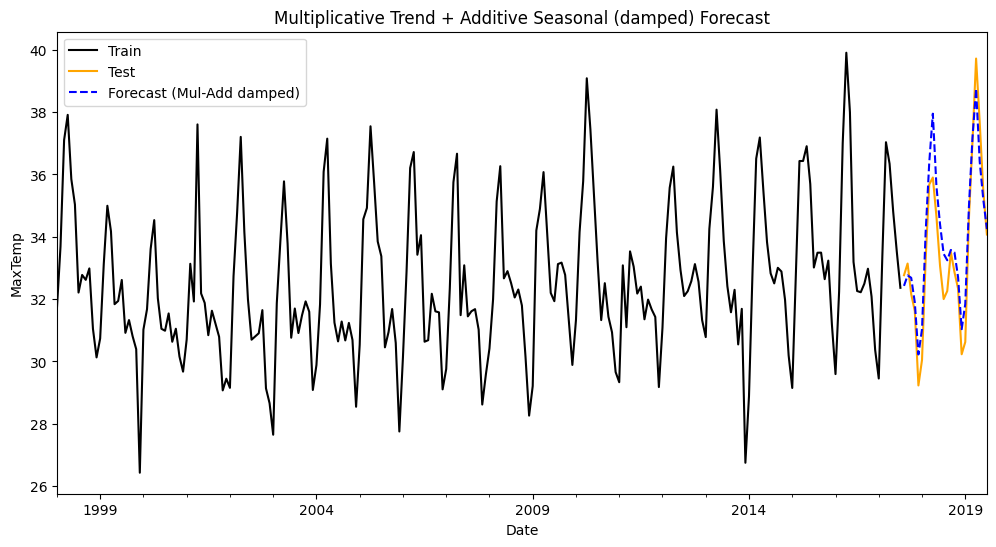

In [48]:
from pickle import TRUE
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Multiplicative trend + Additive seasonal, non-damped
es = ExponentialSmoothing(
    train,
    trend='mul',
    damped=True,           # damped
    seasonal='add',
    seasonal_periods=12
)
es_fit = es.fit(optimized=True)

# forecast
yhat = es_fit.predict(start=test.index[0], end=test.index[-1])

# Plot ข้อมูลจริง vs forecast
plt.figure(figsize=(12,6))
train.plot(label='Train', color='black')
test.plot(label='Test', color='orange')
yhat.plot(label='Forecast (Mul-Add damped)', color='blue', linestyle='--')
plt.title("Multiplicative Trend + Additive Seasonal (damped) Forecast")
plt.xlabel("Date")
plt.ylabel("MaxTemp")
plt.legend()
plt.show()